# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


/Users/jamesclare/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
clean_hospital_read_df.iloc[-5:]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


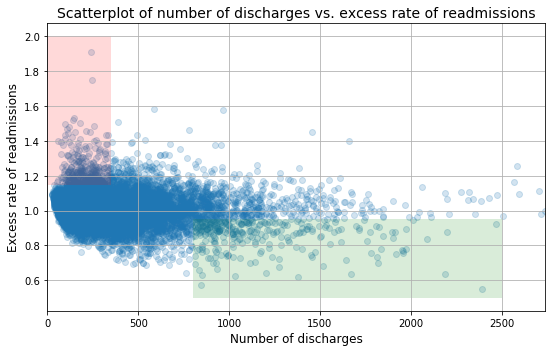

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]] # why not include last 3 data points?
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3]) #  why not include last 3 data points?

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn

In [7]:
# function for pairs boostrap regression testing
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

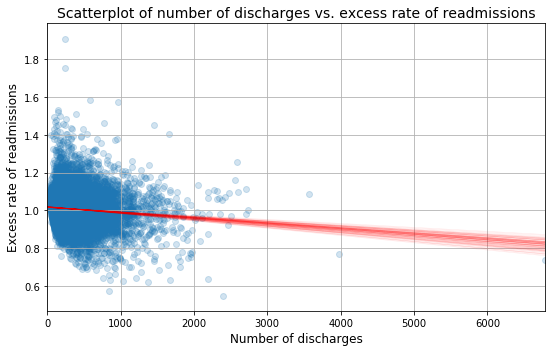

In [8]:
# create x and y to np arrays for bootstrapping
x = np.array(clean_hospital_read_df['Number of Discharges'][81:]) # Note: now including outer 3 to test
y = np.array(clean_hospital_read_df['Excess Readmission Ratio'][81:]) 

# generate 1000 replicates using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x, y, size=1000)

# plot data points
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

# plot pairs bootstrap regression
x_params = np.array([0,np.max(x)])

for i in range(100):
    ax.plot(x_params, bs_slope_reps[i] * x_params + bs_intercept_reps[i], linewidth=0.5, alpha=0.1, color='red')

ax.grid(True)
fig.tight_layout()

In [9]:
# function for calculating Pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# calculate observed correlation coefficient
observed_pearson_r = pearson_r(x, y)

print("The observed correlation coefficent is:", observed_pearson_r)

The observed correlation coefficent is: -0.0973979435108


**Null Hypothesis ($H_0$):** there is no correlation between the number of discharges and the excess rate of readmission.

**Test Setup:** assuming $H_0$ is true, we would observe a Pearson correlation coefficient ($\rho$) of 0, indicating no correlation between the two variables.  

In [10]:
# intitialize 100,000 permutation replicates
perm_replicates = np.empty(100000)

# draw repplicates
for i in range(100000):
    # permute x
    x_permuted = np.random.permutation(x)
    
    # computer Pearson correlation
    perm_replicates[i] = pearson_r(x_permuted, y)
    
# compute p value
p_value = np.sum(perm_replicates <= observed_pearson_r)/len(perm_replicates)

print("The bootstrap computed p-value is", p_value)

The bootstrap computed p-value is 0.0


Text(0.5,1,'Histogram of Bootstrap Replicates (Pearson coefficient)')

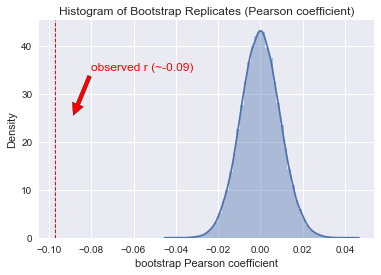

In [11]:
# visualize bootstrap replicates and observed pearson coefficient
import seaborn as sns
sns.set()

sns.distplot(perm_replicates, norm_hist=True)
plt.axvline(observed_pearson_r, color='red', linestyle='dashed', linewidth=1)
plt.annotate("observed r (~-0.09)", xy=(-0.089,25), xytext=(-0.08,35), arrowprops=dict(facecolor='red', shrink=0.05), color='red')
plt.xlabel('bootstrap Pearson coefficient')
plt.ylabel('Density')
plt.title('Histogram of Bootstrap Replicates (Pearson coefficient)')


**Bootstrap Hypothesis Test Conclusion:** after 100,000 random bootstrap replicates were generated using the code above, not a single replicate was as low as our observed Pearson coefficient of ~-0.097.  Therefore, the p-value of our observed Pearson coefficient is $\leq$ 0.00001.  We can conclude that this is a *statisically significant* result, however the observed correlation is very small (~0.097) and therefore the *practical significance* is low.  In other words, while there is a correlation, it is not large enough to support the drastic recommendations above.  

**Revise Recommendation to Client:** while there is some justification for incentivizing increased volume (as measured by number of discharges), the correlation between discharges and excess rate of readmission is very low.  Therefor, it does not make sense to impose a policy that would shut down smaller facilities (i.e., lower capacity) on this basis because small hospitals are important in more remote communities with smaller populations. 

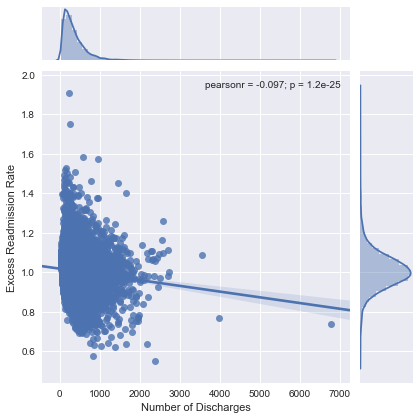

In [27]:
# create DataFrame from arrays x and y for plotting
subset_df = pd.DataFrame({"Number of Discharges":x, "Excess Readmission Rate":y})

# visualization for relationship between excess readmission ratio and discharges
sns.jointplot(x="Number of Discharges", y="Excess Readmission Rate", data=subset_df, kind='reg')
